Interactive Classification
===

Imports and Helper Functions
---

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.colors import ListedColormap
from sklearn.externals.six import StringIO  
from subprocess import call
from sklearn import linear_model
from sklearn import svm

import sys
sys.stdout = open('/dev/stdout', 'w')

import warnings
warnings.filterwarnings('ignore')

%matplotlib notebook

    
def plot2d_data(x,y,data_name,class_names,feature_names,markers=['sr','^b','og']):
    """Plot a 2d data set. x must be an Nx2 array of feature values. 
    y must be a N-long array of label values. data_name is a 
    string giving the name of the data set. The class labels
    must be intergers between 1 and C. class_names must be a 
    list of strings naming the classes. feature_names must be a
    list of strings naming the features."""

    for i in 1+np.arange(len(class_names)):
          plt.plot(x[y==i,0],x[y==i,1],markers[i-1], alpha=0.5);
    plt.xlabel(feature_names[0]);
    plt.ylabel(feature_names[1]);
    plt.grid(True)
    plt.title(data_name)
    plt.legend(class_names)
    plt.tight_layout()

def interactive_classifier(clf,fig):
    """Define an interactive classifier. clf can be any classifier
    object that implements predict. fig must be a figure handle
    to a 2d data plot created using plot2d_data(). The function
    applies the classifier to the points that you click on and
    plots them in the specified figure.
    """
    #Define the event handler
    def onclick(event):
        global N
        global x_tr
        global y_tr
        markers=['sr','^b','og']
        #Get the point that is clicked on
        x = np.array([event.xdata, event.ydata])
        #Call the classifier to classify it
        #y = int(clf.predict(x)[0])
        #Plot the point
        
        x_tr[N,:]=x
        y_tr[N]=int(event.key)
        N=N+1
        
       
        #plot2d_class_map(clf,x,y,data_name,class_names,feature_names,show_data=True,markers=['sr','^b','og']):   
        plt.clf()
        #plot2d_class_map(clf,x_tr,y_tr,"Interactive Classifier",["Class 1","Class 2"],["F1","F2"])
        plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["F1","F2"])
        #plot_prob_classifier(x_tr,y_tr,clf,"Interactive Classifier")
    
    #Create a callback to connect the handler to mouse click events 
    cid = fig.canvas.mpl_connect('button_press_event', onclick)


#Define classifier plotting function
def plot_prob_classifier(clf,x,y,data_name,class_names,feature_names,show_data=True,markers=['sr','^b','og']):  


    if(N>0):
        plot2d_data(x,y,data_name,class_names,feature_names,markers=markers)

        #Prepare grid for plotting decision surface
        gx1, gx2 = np.meshgrid(np.arange(0, 1,1/100.0 ),np.arange(0, 1,1/100.0))

        gx1l = gx1.flatten()
        gx2l = gx2.flatten()
        gx   = np.vstack((gx1l,gx2l)).T

        if(np.any(y==1) and np.any(y==2)):
            #Compute a prediction for every point in the grid
            clf.fit(x,y)
            gyhat = clf.predict_proba(gx)[:,0]
            gyhat = gyhat.reshape(gx1.shape)

            plt.imshow(gyhat, interpolation='nearest',
                   extent=(0, 1, 0, 1), aspect='auto',
                   origin='lower', cmap=plt.cm.bwr, alpha=0.25)
            plt.clim(0,1)
            plt.colorbar();
            contours = plt.contour(gx1, gx2, gyhat, levels=[0.5], linewidths=2,
                               linetypes='-',colors=["k"])    

    plt.xlim((0,1))
    plt.ylim((0,1))
    plt.title(data_name) 
    plt.grid(True)
    
  

Reset Data
---

In [44]:
N=0
x_tr = np.zeros((100,2))
y_tr = np.zeros(100)

Select Linear Model
---

In [45]:
clf = linear_model.LogisticRegression(C=1e6)


Select Non-Linear Model
---

In [34]:
clf = svm.SVC(kernel='rbf',gamma=10, C=100, probability=True)

Start Interactive Classifier
---

<IPython.core.display.Javascript object>


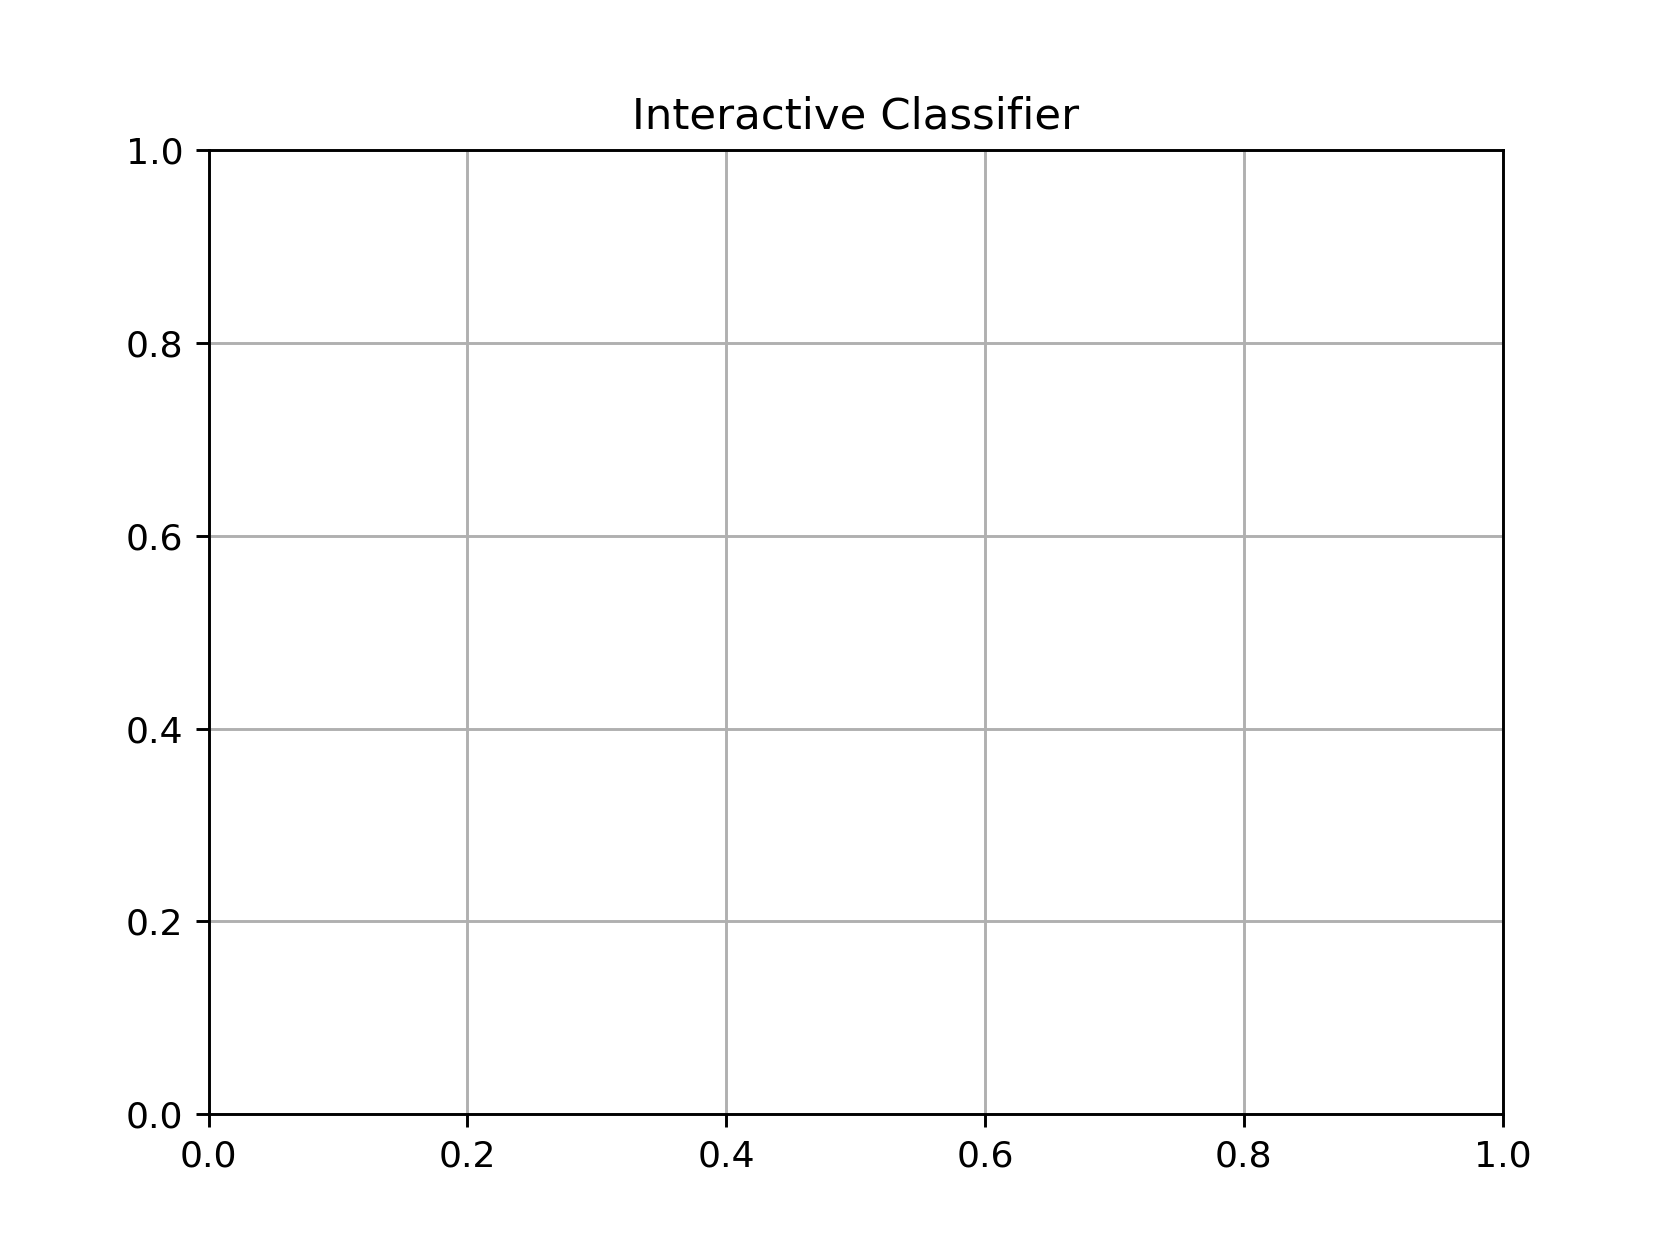

In [46]:
fig = plt.figure()
interactive_classifier(clf,fig)
plot_prob_classifier(clf,x_tr[:N,:],y_tr[:N],"Interactive Classifier",["Class 1","Class 2"],["F1","F2"])

#Hold the "1" key and click to add a data point for class 1
#Hold the "2" key and click to add a data point for class 2


# 